# Reinforcement Learning Crash Course - Youtube Video - Nicholas Renotte
- Youtube link - https://www.youtube.com/watch?v=cO5g5qLrLSo
- Github TF_RL - https://github.com/nicknochnack/TensorflowKeras-ReinforcementLearning
- Keras - https://keras-rl.readthedocs.io/en/latest/core/

### AREA 51
- A - Actoin
- R - Reward
- E - Environment
- A - Agent 

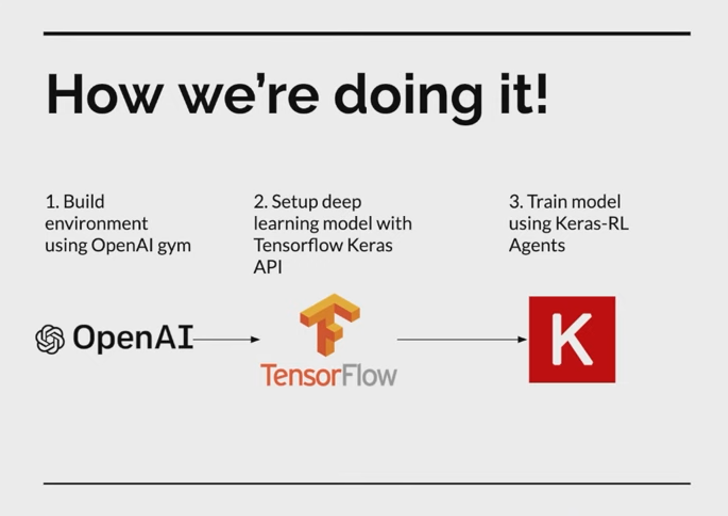

## 0. Install Dependencies

In [1]:
# !pip install tensorflow == 2.3.0
# !pip install keras
# !pip nistall gym
# !pip install keras-rl2

## 1. Test Random Environment from OpenAI GYM

In [2]:
import gym
import random

In [3]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]

In [4]:
episodes = 10
for episode in range(1,episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_stae , reward , done , info = env.step(action)
        score += reward
    print(f"Episode: {episode}, Score: {score}")

Episode: 1, Score: 16.0
Episode: 2, Score: 15.0
Episode: 3, Score: 19.0
Episode: 4, Score: 32.0
Episode: 5, Score: 15.0
Episode: 6, Score: 15.0
Episode: 7, Score: 14.0
Episode: 8, Score: 58.0
Episode: 9, Score: 14.0
Episode: 10, Score: 13.0


## 2. Building a tf.keras Deep Learning Model

In [5]:
import numpy as np
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
def build_model(states,actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24,activation = 'relu'))
    model.add(Dense(24,activation = 'relu'))
    model.add(Dense(actions,activation = 'linear'))
    return model

In [21]:
model = build_model(states,actions)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 24)                120       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


## 3. Build Agents with Keras-RL

In [18]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [11]:
def build_agent(model,actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit = 50000,window_length = 1)
    dqn = DQNAgent(model=model,memory = memory , policy = policy,nb_actions = actions , nb_steps_warmup = 10 , target_model_update =1e-2)
    return dqn

In [23]:
dqn = build_agent(model,actions)
dqn.compile(Adam(lr = 1e-3) , metrics= ['mae'])
dqn.fit(env,nb_steps = 5000 , visualize = False , verbose = 1)

Training for 5000 steps ...
Interval 1 (0 steps performed)


d:\Src\Anaconda\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   10/10000 [..............................] - ETA: 56s - reward: 1.0000    

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


 4996/10000 [=============>................] - ETA: 48s - reward: 1.0000done, took 50.395 seconds


In [24]:
scores = dqn.test(env , nb_episodes=100 , visualize = False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [25]:
_ = dqn.test(env , nb_episodes = 5, visualize = True)

Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


## 4. Reloading Agent from Memory

In [26]:
dqn.save_weights('dqn_weights.h5f' , overwrite = True)

In [27]:
del model

In [28]:
dqn.load_weights('dqn_weights.h5f')

In [30]:
_ = dqn.test(env , nb_episodes = 1000, visualize = True)

Testing for 1000 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200


KeyboardInterrupt: 